# 1D-signal distortion
### Loading Data

In [8]:
import pandas as pd
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)

Text(0, 0.5, 'Temperature')

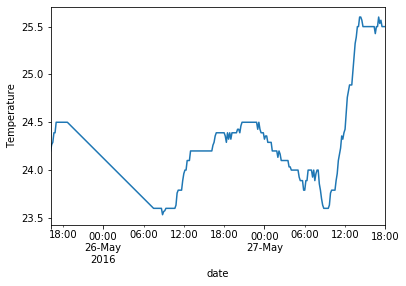

In [11]:
data_A = pd.read_csv('energy_data.csv', parse_dates=['date'])
data_A.set_index('date', inplace=True)
signal = data_A.T1[-300:]
signal.plot().set_ylabel('Temperature')

## Fourier and DFT
You can also try to normalize using `min_max_normalization` in `tsmall.preprocessing`.

In [12]:
a = signal.values  # obtain np.array
A = rfft(a)  # computing Fourier transform
freq = fftfreq(a.shape[-1]//2 + 1)

### Frequency domain

[(0, 2000), (0.002, 0.015), Text(0.5, 1.0, 'Frequency domain')]

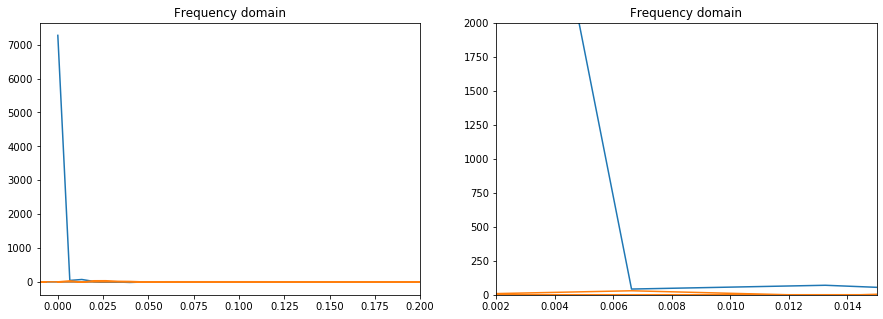

In [22]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].plot(freq, A.real, freq, A.imag)
ax[0].set(title='Frequency domain', xlim=[-0.01, 0.2])
ax[1].plot(freq, A.real, freq, A.imag)
ax[1].set(title='Frequency domain', xlim=[0.002, 0.015], ylim=[0,2000])

Text(0.5, 1.0, 'Histogram of power spectrum')

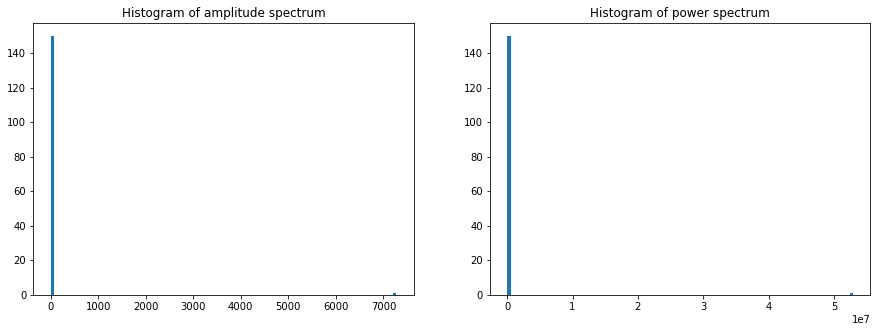

In [23]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].hist(np.abs(A), bins=100)
ax[0].set_title('Histogram of amplitude spectrum')
ax[1].hist(np.abs(A)**2, bins=100)
ax[1].set_title('Histogram of power spectrum')

### Inverse of Fourier transform

In [36]:
# checking the inverse of ftt
isignal = irfft(A)
l = len(A)

perturbed_A = A + np.concatenate((np.zeros(l//3), np.random.normal(0, 1, size=l-l//3)), axis=0)
perturbed_signal = irfft(perturbed_A)

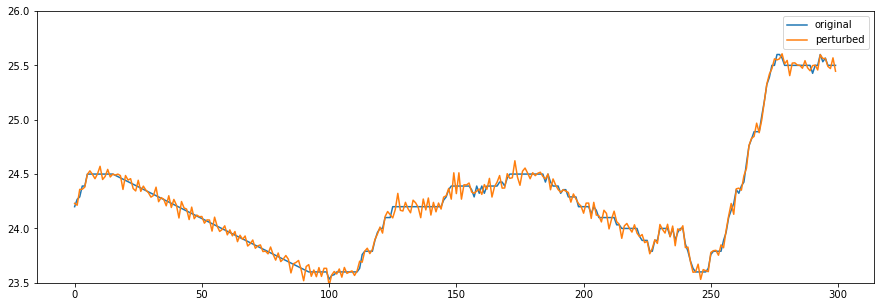

In [37]:
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=1)
plt.setp(ax, ylim=[23.5,26])
ax = plt.plot(isignal, label='original')
ax = plt.plot(perturbed_signal, label='perturbed')
plt.legend()

## Wavelets

In [50]:
import pywt

signal = data_A.T2[-1000:-700].values
cA, cD = pywt.dwt(signal, 'db2')     # decomposition

### Inverse IDWT

In [51]:
# perturbation
perturbed_cA = cA + np.random.normal(0, 0.2, size=len(cA)) # quasi-local perturbations
perturbed_cD = cD + np.random.normal(0, 0, size=len(cD)) # small local perturbations

perturbed_signal = pywt.idwt(perturbed_cA, perturbed_cD, 'db2')

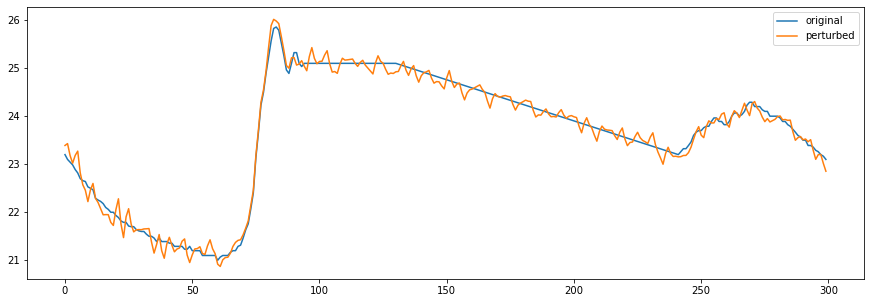

In [52]:
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=1)
#plt.setp(ax, ylim=[23.5,26])
ax = plt.plot(signal, label='original')
ax = plt.plot(perturbed_signal, label='perturbed')
plt.legend()

# using tsmall.augment

In [3]:
from tsmall import *

In [58]:
data_A = pd.read_csv('energy_data.csv', parse_dates=['date'])
data_A.set_index('date', inplace=True)
signal = data_A.T1[-500:-400].values

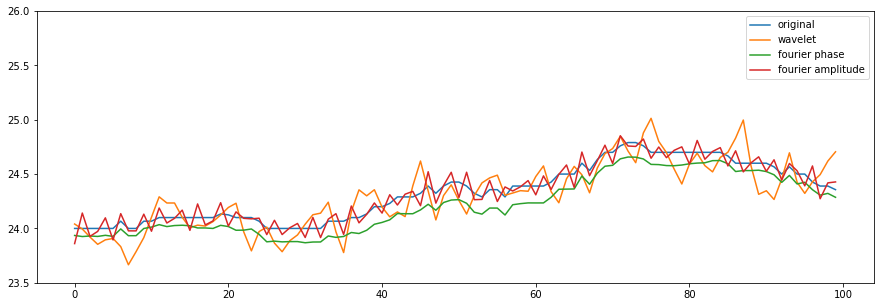

In [61]:
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=1)
plt.setp(ax, ylim=[23.5,26])
ax = plt.plot(signal, label='original')
ax = plt.plot(tsaug(signal, sigma=0.2, method='wavelet'), label='wavelet')
ax = plt.plot(tsaug(signal, sigma=0.15, method='fourier1'), label='fourier phase')
ax = plt.plot(tsaug(signal, sigma=1, method='fourier2'), label='fourier amplitude')
plt.legend()